In [1]:
import cv2
import numpy as np
import wand
import uuid
import os
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [2]:
from wand.image import Image
from wand.color import Color

In [3]:
def convertPdfToImage(filename):
    directory = os.path.dirname(os.getcwd()+"/"+filename+"/").replace(".","")
    if not os.path.exists(directory):
        os.makedirs(directory)
    doc = Image(filename=os.getcwd()+"/"+filename,resolution=200)
    doc.compression_quality = 80
    uuid_set = str(uuid.uuid4().fields[-1])[:5]
    for i, page in enumerate(doc.sequence):
        with Image(page) as page_image:
            page_image.alpha_channel = False
            page_image.background_color = Color('white')
            save_location =  directory+"/img-{}.jpg".format(str(i).zfill(4))
            page_image.save(filename=save_location)

In [4]:
convertPdfToImage('documents/wf01.pdf')

In [5]:
convertPdfToImage('documents/tiaa.pdf')

In [6]:
def readImagesForPdf(filename,img_read_method=cv2.IMREAD_UNCHANGED):
    directory = os.path.dirname(os.getcwd()+"/"+filename+"/").replace(".","")
    images = []
    for f in glob.glob(directory+"/*.jpg"):
        images.append(cv2.imread(f,img_read_method))
    return images

In [7]:
wf_imgs = readImagesForPdf('documents/wf01.pdf',0)
tiaa_imgs = readImagesForPdf('documents/tiaa.pdf',0)

In [8]:
wf = cv2.imread('keys/wellsfargo.png',0)
tiaa= cv2.imread('keys/tiaa.png',0)

In [9]:
SIFT = cv2.ORB_create

In [14]:
tiaa = cv2.imread("keys/tiaa/tiaa.png",0)

In [15]:
tiaa_imgs = [cv2.imread("documents/tiaa/img-0000.jpg",0)]

16


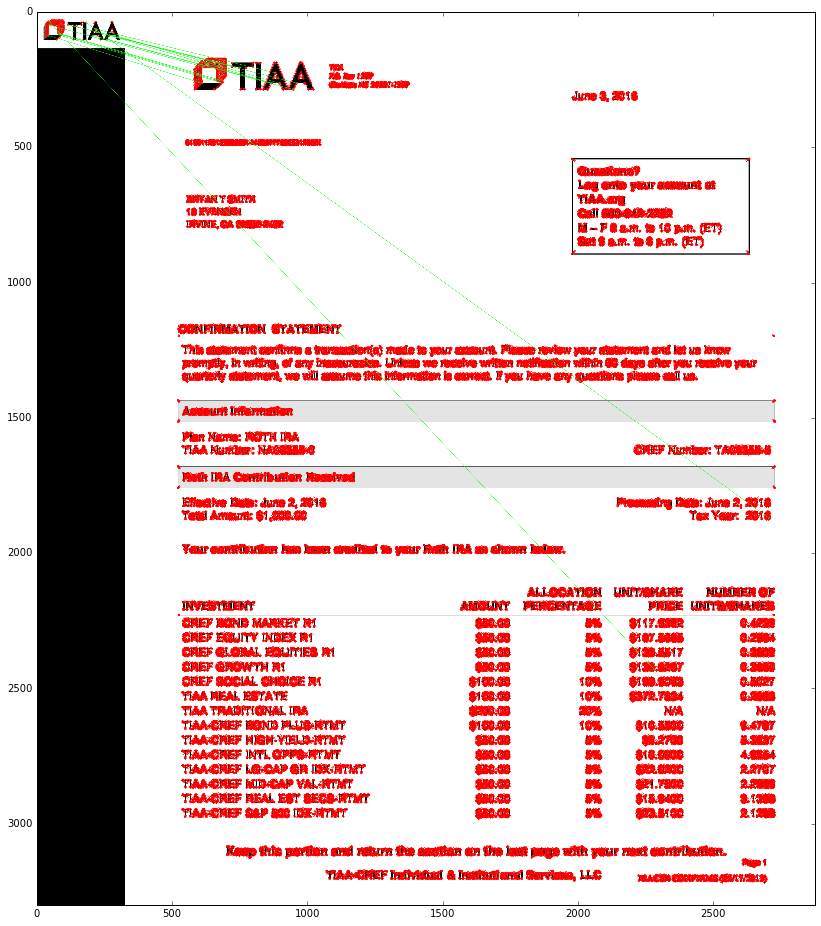

In [16]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 10

img1 = tiaa          # queryImage
img2 = tiaa_imgs[0] # trainImage

# Initiate SIFT detector
sift = cv2.ORB_create() #cv2.SIFT()
sift.setMaxFeatures(1000000)
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

#FLANN_INDEX_KDTREE = 0
#index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 50)
#search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(np.float32(des1),np.float32(des2),k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in xrange(len(matches))]

# ratio test as per Lowe's paper
count = 0
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
        count += 1
print count

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

plt.figure(figsize=(16,16))
plt.imshow(img3,)
plt.show()

In [11]:
img1

In [12]:
for template in [wf,tiaa]:
    for s in np.linspace(0.3,1,2):
        img = wf_imgs[0].copy()
        #template = tiaa.copy()
        new_shape = (int(template.shape[0]*s),int(template.shape[1]*s))
        template = cv2.resize(template,new_shape)
        h, w = template.shape

        # Apply template Matching
        res = cv2.matchTemplate(img,template,cv2.TM_SQDIFF_NORMED)
        print s,cv2.minMaxLoc(res)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        top_left = min_loc
        bottom_right = (top_left[0] + h, top_left[1] + w)
        cv2.rectangle(img,top_left, bottom_right, 0, 10)
        plt.figure(figsize=(16,16))
        plt.imshow(img,cmap='Greys')
        plt.show()

AttributeError: 'NoneType' object has no attribute 'shape'

In [100]:
(min_loc[0]-h,min_loc[1]),(min_loc[0]+h,min_loc[1]+w)

((1007, 66), (1539, 350))

In [90]:
cv2.minMaxLoc(res)

(0.876295268535614, 1.0, (1273, 66), (0, 0))

In [65]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

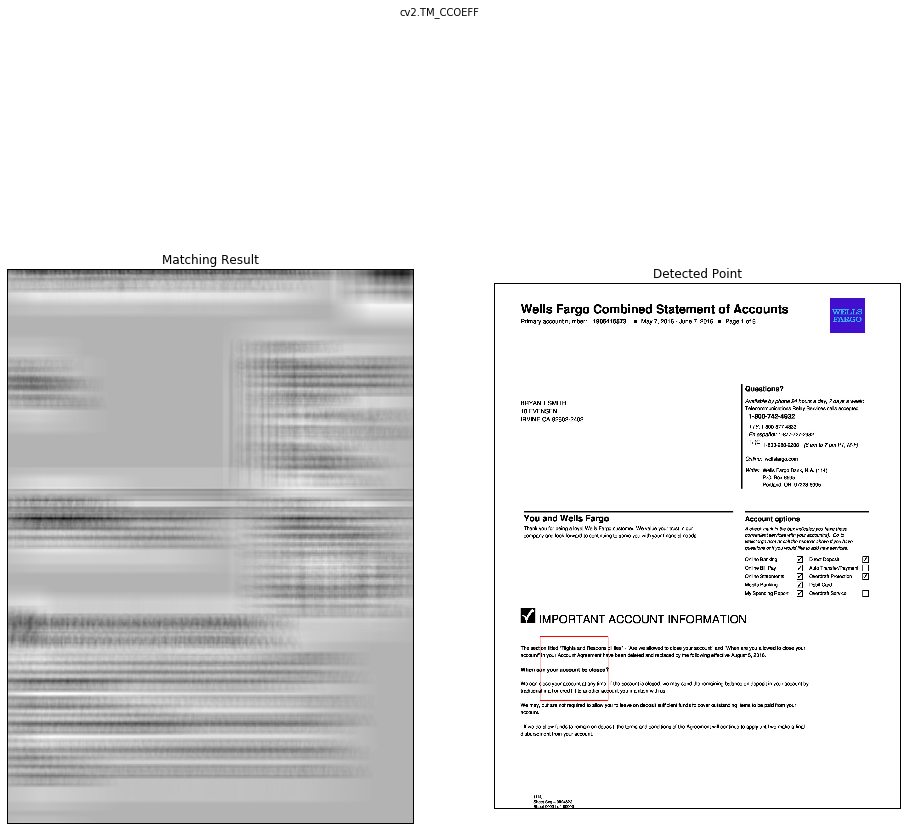

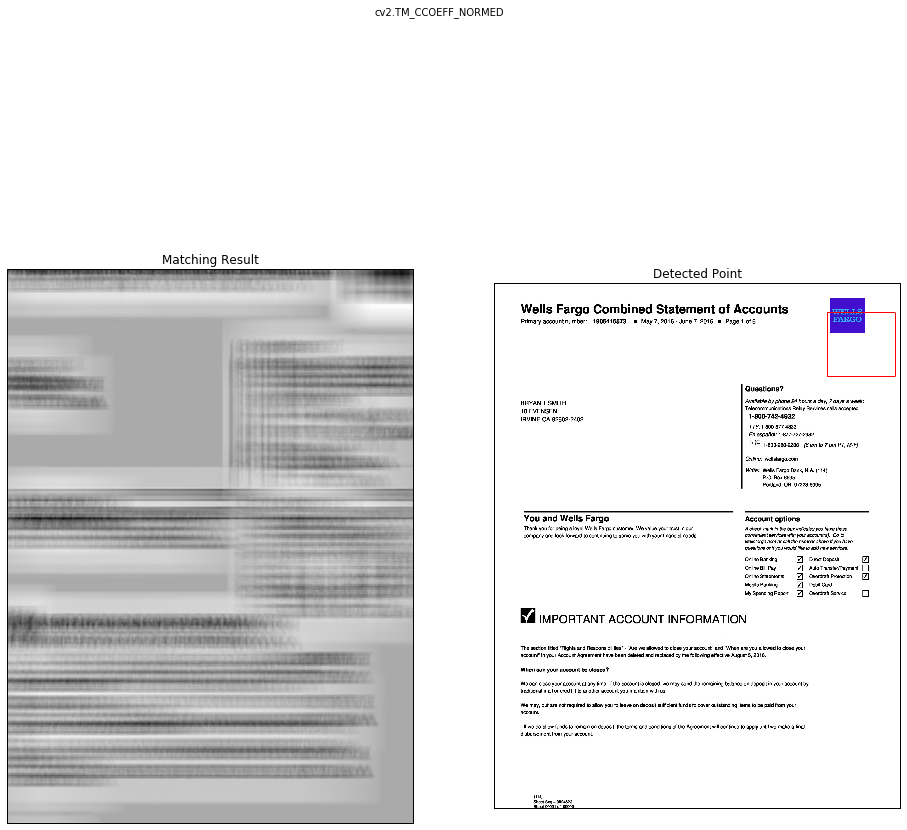

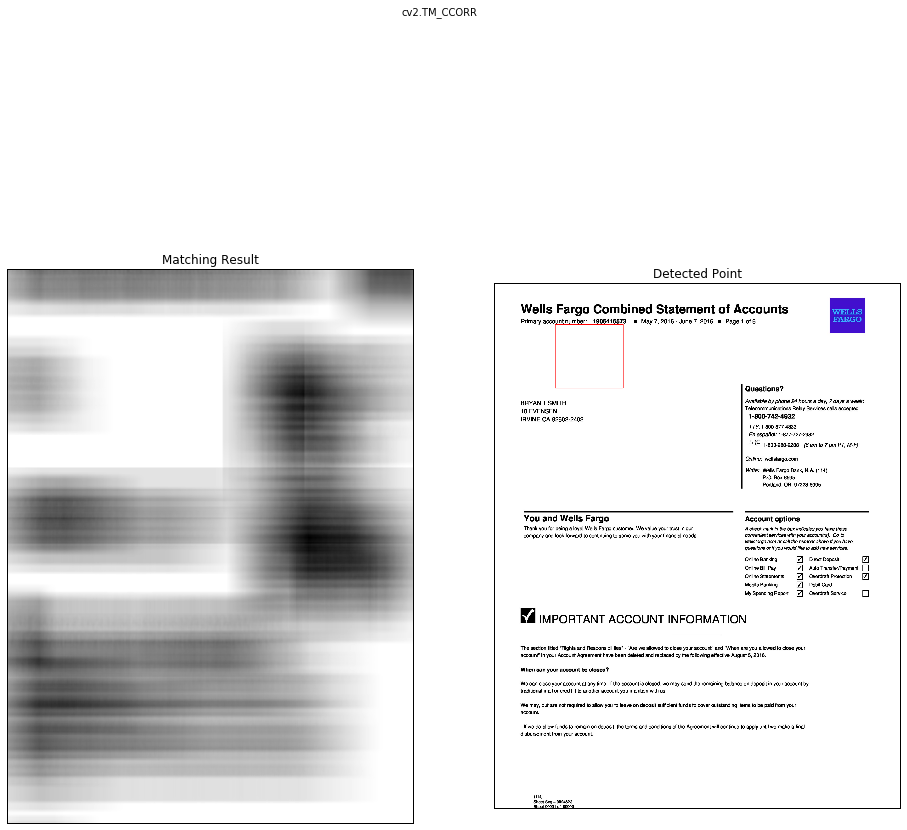

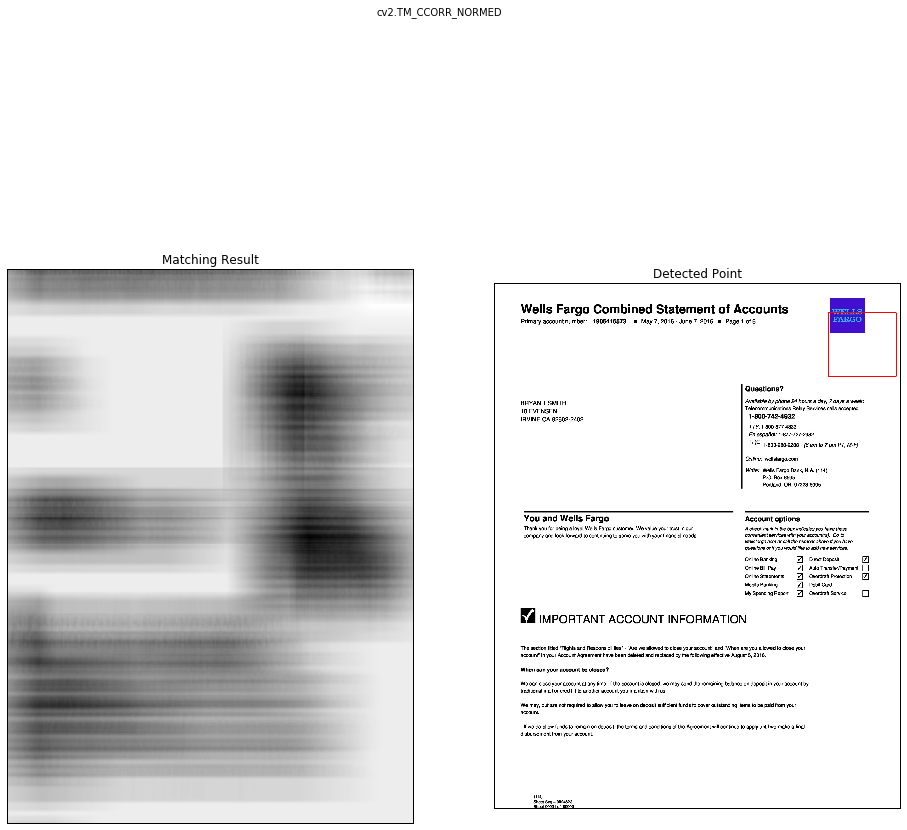

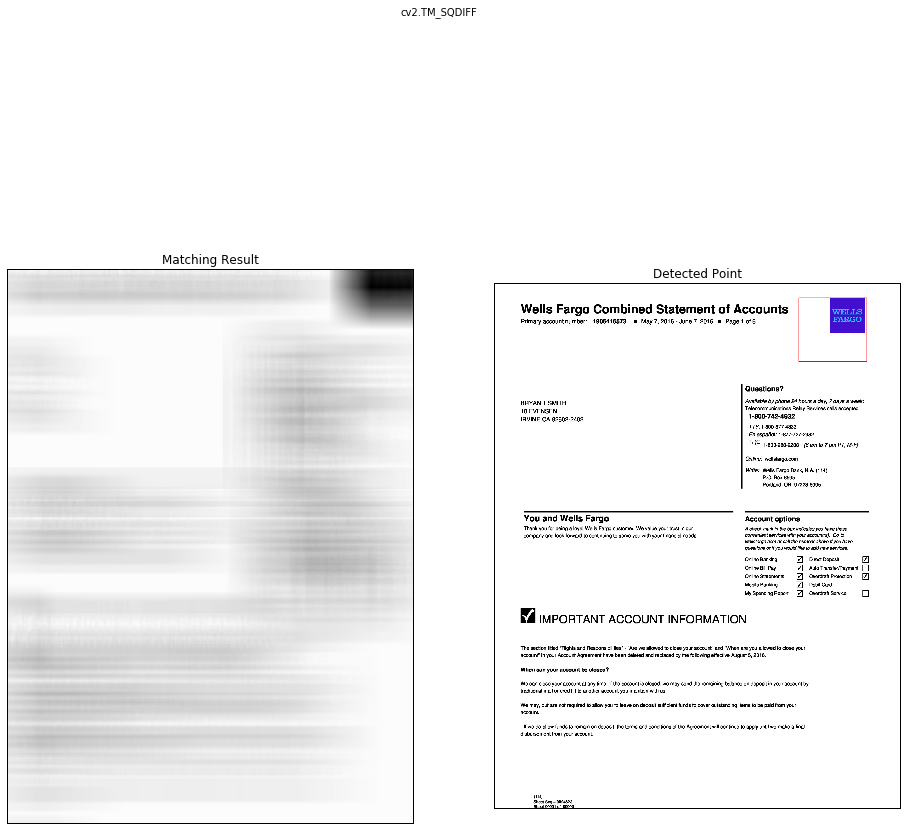

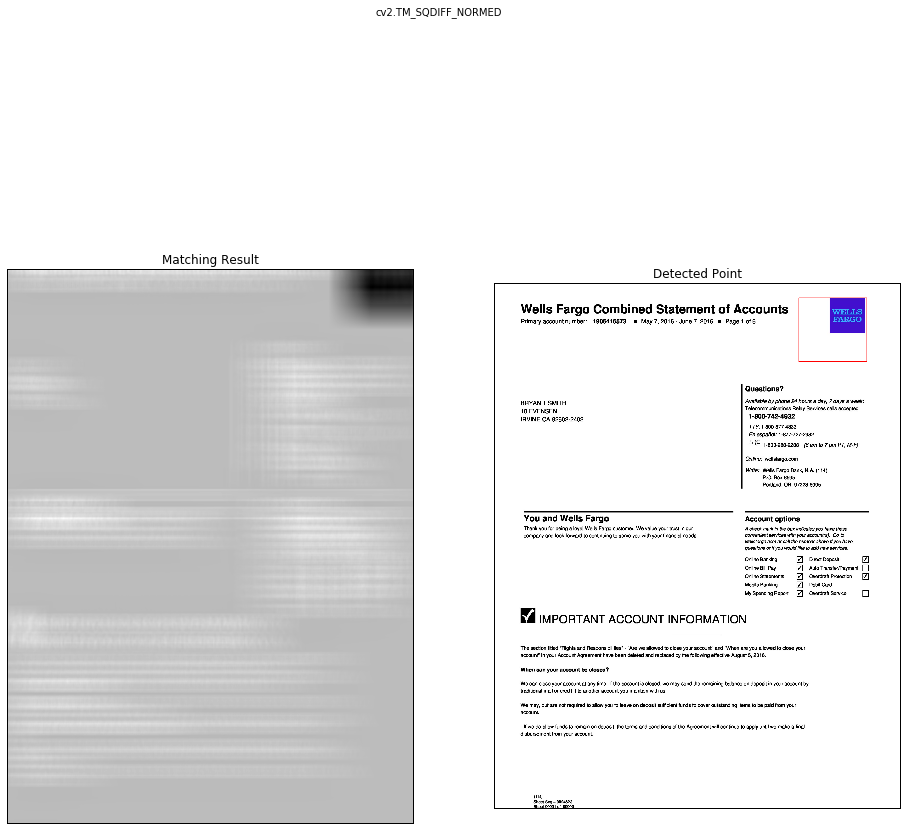

In [70]:
for meth in methods:
    img = images[0].copy()
    template = wf.copy()
    method = eval(meth)
    h, w, c = template.shape

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.figure(figsize=(16,16))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

In [ ]:
images

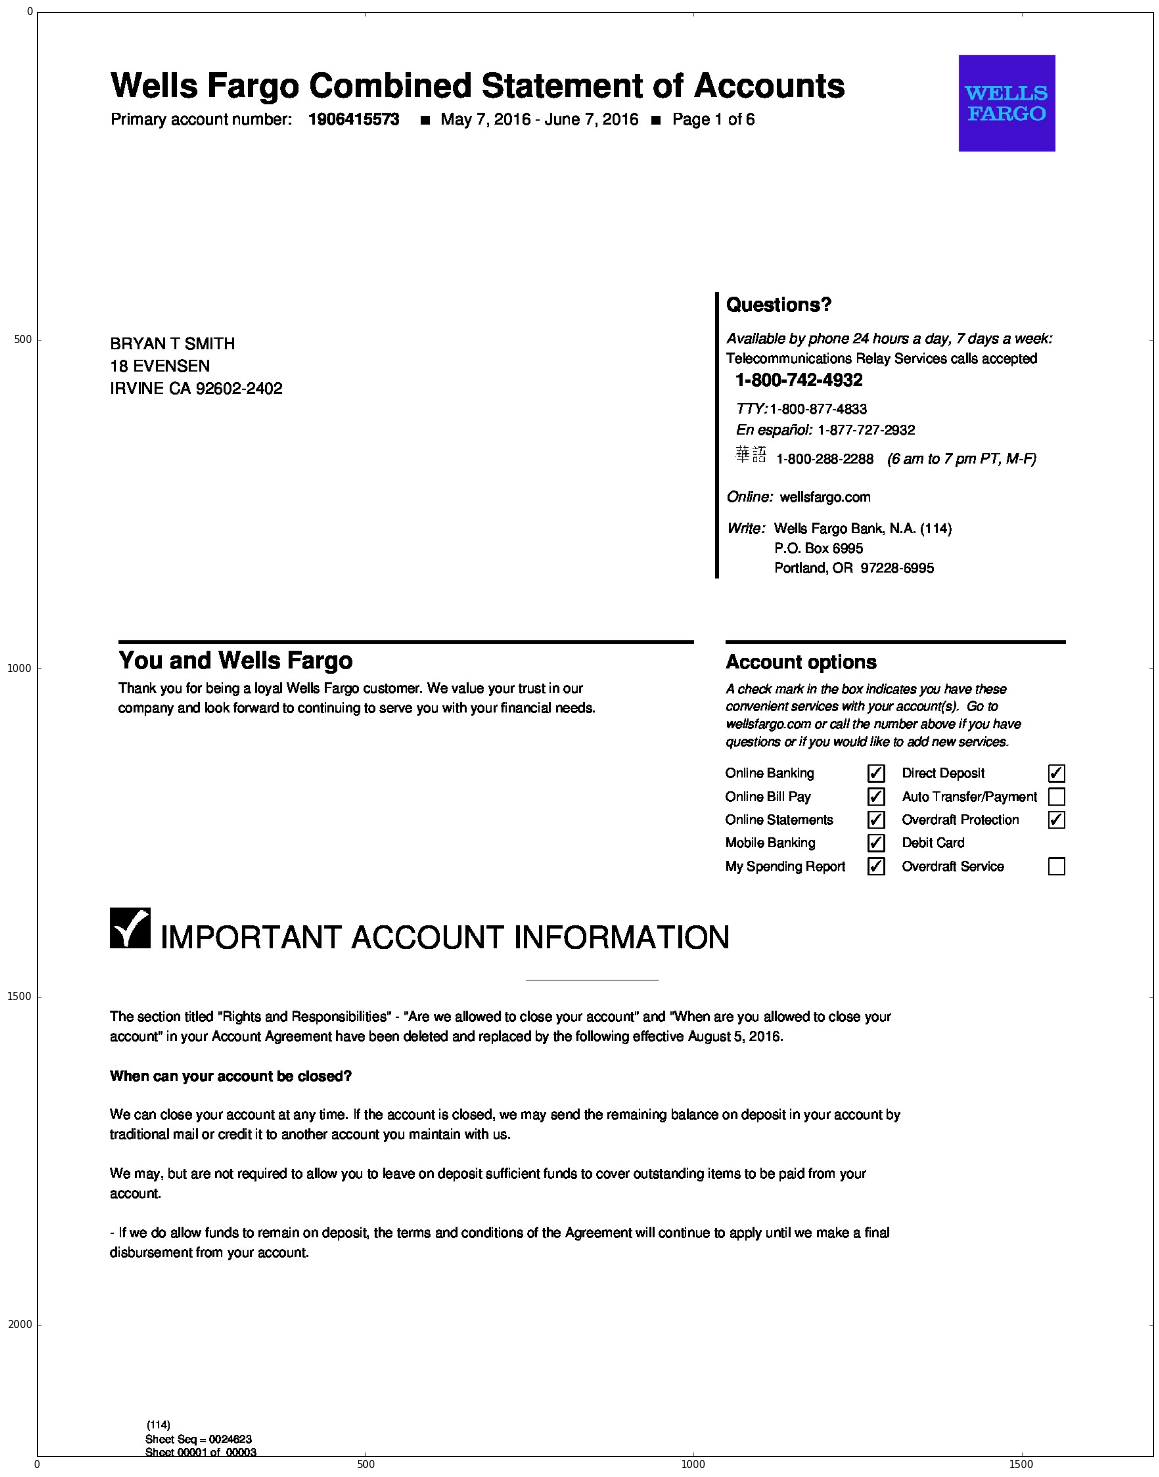

In [63]:
plt.figure(figsize=(20,40))
plt.imshow(images[0])

In [4]:
uuid_set = str(uuid.uuid4().fields[-1])[:5]

In [5]:
d1 = Image(filename='documents/wf01.pdf',resolution=200)
d1.compression_quality = 80
#d1.save(filename = "{}.jpg".format(uuid_set))

In [37]:
for i, page in enumerate(d1.sequence):
    with Image(page) as page_image:
        page_image.alpha_channel = False
        page_image.background_color = Color('white')
        page_image.save(filename='documents/temp/wf01-%s.png' % i)


In [23]:
page_image.page_x()


ClosedImageError: <wand.image.Image: (closed)> is closed already

In [20]:
img_buffer.shape

(413259,)

In [ ]:
from wand.image import Image
from wand.display import display

with Image(filename='mona-lisa.png') as img:
    print(img.size)
    for r in 1, 2, 3:
        with img.clone() as i:
            i.resize(int(i.width * r * 0.25), int(i.height * r * 0.25))
            i.rotate(90 * r)
            i.save(filename='mona-lisa-{0}.png'.format(r))
            display(i)